In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Duplicate key in file PosixPath('/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family : IPAexGothic')


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("submit_sample.csv",header=None)

In [4]:
train.head()

id  age           job  marital  education default  balance housing loan  \
0   1   39   blue-collar  married  secondary      no     1756     yes   no   
1   2   51  entrepreneur  married    primary      no     1443      no   no   
2   3   36    management   single   tertiary      no      436      no   no   
3   4   63       retired  married  secondary      no      474      no   no   
4   5   31    management   single   tertiary      no      354      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome  y  
0  cellular    3   apr       939         1     -1         0  unknown  1  
1  cellular   18   feb       172        10     -1         0  unknown  1  
2  cellular   13   apr       567         1    595         2  failure  1  
3  cellular   25   jan       423         1     -1         0  unknown  1  
4  cellular   30   apr       502         1      9         2  success  1

In [5]:
train.describe()

id           age        balance           day      duration  \
count  27128.000000  27128.000000   27128.000000  27128.000000  27128.000000   
mean   13564.500000     40.951010    1355.800870     15.806215    260.711295   
std     7831.323388     10.608542    3003.305272      8.337904    260.091727   
min        1.000000     18.000000   -6847.000000      1.000000      0.000000   
25%     6782.750000     33.000000      72.000000      8.000000    104.000000   
50%    13564.500000     39.000000     449.000000     16.000000    182.000000   
75%    20346.250000     48.000000    1428.000000     21.000000    323.000000   
max    27128.000000     95.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous             y  
count  27128.000000  27128.000000  27128.000000  27128.000000  
mean       2.751769     40.528052      0.579733      0.117001  
std        3.126594    100.382462      2.503653      0.321427  
min        1.000000     -1.000000      0.000000      0.000000  
25%        1.000000     -1.000000      0.000000      0.000000  
50%        2.000000     -1.000000      0.000000      0.000000  
75%        3.000000     -1.000000      0.000000      0.000000  
max       63.000000    871.000000    275.000000      1.000000

In [6]:
train.describe(include="O")

job  marital  education default housing   loan   contact  \
count         27128    27128      27128   27128   27128  27128     27128   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           5886    16411      13882   26644   15125  22788     17580   

        month poutcome  
count   27128    27128  
unique     12        4  
top       may  unknown  
freq     8317    22150

In [7]:
train.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
train.corr()

id       age   balance       day  duration  campaign  \
id        1.000000 -0.005716 -0.000484  0.002974  0.002705  0.016867   
age      -0.005716  1.000000  0.095343 -0.008518 -0.005309 -0.001340   
balance  -0.000484  0.095343  1.000000  0.002067  0.019923 -0.016295   
day       0.002974 -0.008518  0.002067  1.000000 -0.032453  0.164880   
duration  0.002705 -0.005309  0.019923 -0.032453  1.000000 -0.087771   
campaign  0.016867 -0.001340 -0.016295  0.164880 -0.087771  1.000000   
pdays    -0.004526 -0.025272  0.003613 -0.096889  0.002030 -0.086220   
previous -0.005425  0.002946  0.012483 -0.050009  0.002489 -0.031557   
y        -0.003555  0.020892  0.045826 -0.031058  0.401390 -0.076118   

             pdays  previous         y  
id       -0.004526 -0.005425 -0.003555  
age      -0.025272  0.002946  0.020892  
balance   0.003613  0.012483  0.045826  
day      -0.096889 -0.050009 -0.031058  
duration  0.002030  0.002489  0.401390  
campaign -0.086220 -0.031557 -0.076118  
pdays     1.000000  0.421606  0.100930  
previous  0.421606  1.000000  0.083825  
y         0.100930  0.083825  1.000000

<AxesSubplot:ylabel='Frequency'>

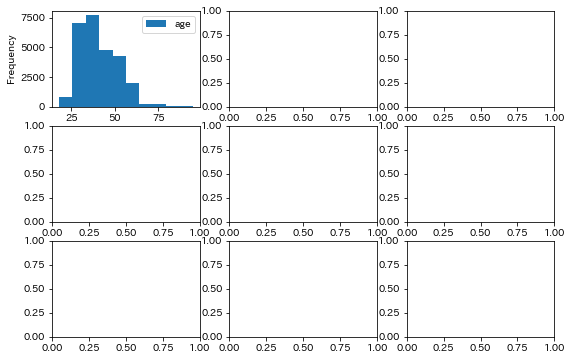

In [9]:
fig, ax = plt.subplots(3,3,figsize=(9,6))
train.plot.hist(x="y", y="age", ax=ax[0][0])

In [10]:
marital = pd.crosstab(train["marital"],train["y"],margins=True)
marital["rate"] = marital[1] / marital["All"]
marital

y             0     1    All      rate
marital                               
divorced   2691   364   3055  0.119149
married   14744  1667  16411  0.101578
single     6519  1143   7662  0.149178
All       23954  3174  27128  0.117001

In [11]:
#job	marital	education	default	housing	loan	contact	month	poutcome

education = pd.crosstab(train["education"],train["y"],margins=True)
education["rate"] = education[1] / education["All"]
education

y              0     1    All      rate
education                              
primary     3798   352   4150  0.084819
secondary  12382  1500  13882  0.108054
tertiary    6790  1169   7959  0.146878
unknown      984   153   1137  0.134565
All        23954  3174  27128  0.117001

In [12]:
age_bining = pd.cut(train["age"],[0,20,40,60,100])
age = pd.crosstab(age_bining,train["y"],margins=True)
age["rate"] = age[1] / age["All"]
age

y              0     1    All      rate
age                                    
(0, 20]       39    21     60  0.350000
(20, 40]   12974  1766  14740  0.119810
(40, 60]   10533  1090  11623  0.093780
(60, 100]    408   297    705  0.421277
All        23954  3174  27128  0.117001

In [15]:
duration_bening = pd.cut(train["duration"], [-1,100,200,300,400,500,600,700,800,900,1000,5000])
duration = pd.crosstab(duration_bening,train["y"],margins=True)

In [18]:
duration["rate"] = duration [1] / duration["All"]
duration

y                 0     1    All      rate
duration                                  
(-1, 100]      6379    60   6439  0.009318
(100, 200]     7909   450   8359  0.053834
(200, 300]     4286   557   4843  0.115011
(300, 400]     2258   408   2666  0.153038
(400, 500]     1231   308   1539  0.200130
(500, 600]      699   270    969  0.278638
(600, 700]      441   259    700  0.370000
(700, 800]      245   189    434  0.435484
(800, 900]      149   153    302  0.506623
(900, 1000]      95   123    218  0.564220
(1000, 5000]    262   397    659  0.602428
All           23954  3174  27128  0.117001

In [34]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [35]:
trainX = train.iloc[:,0:17]
y = train["y"]

In [36]:
trainX.head()

id  age           job  marital  education default  balance housing loan  \
0   1   39   blue-collar  married  secondary      no     1756     yes   no   
1   2   51  entrepreneur  married    primary      no     1443      no   no   
2   3   36    management   single   tertiary      no      436      no   no   
3   4   63       retired  married  secondary      no      474      no   no   
4   5   31    management   single   tertiary      no      354      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome  
0  cellular    3   apr       939         1     -1         0  unknown  
1  cellular   18   feb       172        10     -1         0  unknown  
2  cellular   13   apr       567         1    595         2  failure  
3  cellular   25   jan       423         1     -1         0  unknown  
4  cellular   30   apr       502         1      9         2  success

In [37]:
testX = test.copy()

In [38]:
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)

In [39]:
clf1 = DT(max_depth=2, min_samples_leaf=500)

In [40]:
clf1.fit(trainX,y)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=500)

In [41]:
export_graphviz(clf1, out_file="tree.dot", feature_names=trainX.columns, class_names=["0","1"], filled=True, rounded=True)

In [64]:
g = pydotplus.graph_from_dot_file(path="tree.dot")
Image(g.create_png())

InvocationException: GraphViz's executables not found

グラフが表示されないのでこちらで出力
http://www.webgraphviz.com/

In [48]:
pred = clf1.predict_proba(trainX)

In [49]:
pred

array([[0.41565704, 0.58434296],
       [0.94135287, 0.05864713],
       [0.63636364, 0.36363636],
       ...,
       [0.94135287, 0.05864713],
       [0.94135287, 0.05864713],
       [0.94135287, 0.05864713]])

In [50]:
pred = pred[:,1]

In [51]:
pred

array([0.58434296, 0.05864713, 0.36363636, ..., 0.05864713, 0.05864713,
       0.05864713])

In [58]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
print("AUC=", metrics.auc(fpr, tpr))

AUC= 0.748710916675571


In [59]:
clf2 = DT(max_depth=4, min_samples_leaf=500)

In [60]:
clf2.fit(trainX,y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=500)

In [62]:
pred2 = clf2.predict_proba(trainX)
pred2 = pred2[:,1]

In [63]:
fpr2, tpr2, thresholds = metrics.roc_curve(y, pred2)
print("AUC=", metrics.auc(fpr2, tpr2))

AUC= 0.8512051414549595
